# Abstract
* A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.
* Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

#### Context
* Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on Cloud can solve this problem.

# PACKAGES AND LIBRARIES

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam

#### IGNORING WARNINGS

In [2]:
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH PROCESS

#### TRAIN

In [3]:
Train_Data_Path = Path("../input/brain-tumor-classification-mri/Training")

In [4]:
Train_JPG_Path = list(Train_Data_Path.glob(r"*/*.jpg"))

In [5]:
print(Train_JPG_Path[0:10])

[PosixPath('../input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg'), PosixPath('../input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg'), PosixPath('../input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg'), PosixPath('../input/brain-tumor-classification-mri/Training/no_tumor/6.jpg'), PosixPath('../input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg'), PosixPath('../input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg'), PosixPath('../input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg'), PosixPath('../input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg'), PosixPath('../input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg'), PosixPath('../input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg')]


In [6]:
Train_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Train_JPG_Path))

In [7]:
print("NO: ",Train_JPG_Labels.count("no_tumor"))
print("Pituitary: ",Train_JPG_Labels.count("pituitary_tumor"))
print("Meningioma: ",Train_JPG_Labels.count("meningioma_tumor"))
print("Glioma: ",Train_JPG_Labels.count("glioma_tumor"))

NO:  395
Pituitary:  827
Meningioma:  822
Glioma:  826


In [8]:
Train_JPG_Path_Series = pd.Series(Train_JPG_Path,name="JPG").astype(str)
Train_JPG_Labels_Series = pd.Series(Train_JPG_Labels, name="TUMOR_CATEGORY")

In [9]:
print(Train_JPG_Path_Series.head())
print("-----"*20)
print(Train_JPG_Labels_Series.head())

0    ../input/brain-tumor-classification-mri/Traini...
1    ../input/brain-tumor-classification-mri/Traini...
2    ../input/brain-tumor-classification-mri/Traini...
3    ../input/brain-tumor-classification-mri/Traini...
4    ../input/brain-tumor-classification-mri/Traini...
Name: JPG, dtype: object
----------------------------------------------------------------------------------------------------
0    no_tumor
1    no_tumor
2    no_tumor
3    no_tumor
4    no_tumor
Name: TUMOR_CATEGORY, dtype: object


In [10]:
Main_Train_Data = pd.concat([Train_JPG_Path_Series,Train_JPG_Labels_Series],axis=1)

In [11]:
print(Main_Train_Data.head())

                                                 JPG TUMOR_CATEGORY
0  ../input/brain-tumor-classification-mri/Traini...       no_tumor
1  ../input/brain-tumor-classification-mri/Traini...       no_tumor
2  ../input/brain-tumor-classification-mri/Traini...       no_tumor
3  ../input/brain-tumor-classification-mri/Traini...       no_tumor
4  ../input/brain-tumor-classification-mri/Traini...       no_tumor


#### TEST

In [12]:
Test_Data_Path = Path("../input/brain-tumor-classification-mri/Testing")

In [13]:
Test_JPG_Path = list(Test_Data_Path.glob(r"*/*.jpg"))

In [14]:
print(Test_JPG_Path[0:5])

[PosixPath('../input/brain-tumor-classification-mri/Testing/no_tumor/image(84).jpg'), PosixPath('../input/brain-tumor-classification-mri/Testing/no_tumor/image(44).jpg'), PosixPath('../input/brain-tumor-classification-mri/Testing/no_tumor/image(29).jpg'), PosixPath('../input/brain-tumor-classification-mri/Testing/no_tumor/image(52).jpg'), PosixPath('../input/brain-tumor-classification-mri/Testing/no_tumor/image(33).jpg')]


In [15]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [16]:
print("NO: ",Test_JPG_Labels.count("no_tumor"))
print("Pituitary: ",Test_JPG_Labels.count("pituitary_tumor"))
print("Meningioma: ",Test_JPG_Labels.count("meningioma_tumor"))
print("Glioma: ",Test_JPG_Labels.count("glioma_tumor"))

NO:  105
Pituitary:  74
Meningioma:  115
Glioma:  100


In [17]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Labels = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [18]:
print(Test_JPG_Path_Series.head())
print("-----"*20)
print(Test_JPG_Labels_Labels.head())

0    ../input/brain-tumor-classification-mri/Testin...
1    ../input/brain-tumor-classification-mri/Testin...
2    ../input/brain-tumor-classification-mri/Testin...
3    ../input/brain-tumor-classification-mri/Testin...
4    ../input/brain-tumor-classification-mri/Testin...
Name: JPG, dtype: object
----------------------------------------------------------------------------------------------------
0    no_tumor
1    no_tumor
2    no_tumor
3    no_tumor
4    no_tumor
Name: TUMOR_CATEGORY, dtype: object


In [19]:
Main_Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Labels],axis=1)

In [20]:
print(Main_Test_Data.head())

                                                 JPG TUMOR_CATEGORY
0  ../input/brain-tumor-classification-mri/Testin...       no_tumor
1  ../input/brain-tumor-classification-mri/Testin...       no_tumor
2  ../input/brain-tumor-classification-mri/Testin...       no_tumor
3  ../input/brain-tumor-classification-mri/Testin...       no_tumor
4  ../input/brain-tumor-classification-mri/Testin...       no_tumor


# SHUFFLING

In [21]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)
Main_Test_Data = Main_Test_Data.sample(frac=1).reset_index(drop=True)

In [22]:
print(Main_Train_Data.head(10))
print("----"*20)
print(Main_Test_Data.head(10))

                                                 JPG    TUMOR_CATEGORY
0  ../input/brain-tumor-classification-mri/Traini...  meningioma_tumor
1  ../input/brain-tumor-classification-mri/Traini...  meningioma_tumor
2  ../input/brain-tumor-classification-mri/Traini...      glioma_tumor
3  ../input/brain-tumor-classification-mri/Traini...      glioma_tumor
4  ../input/brain-tumor-classification-mri/Traini...      glioma_tumor
5  ../input/brain-tumor-classification-mri/Traini...   pituitary_tumor
6  ../input/brain-tumor-classification-mri/Traini...      glioma_tumor
7  ../input/brain-tumor-classification-mri/Traini...  meningioma_tumor
8  ../input/brain-tumor-classification-mri/Traini...   pituitary_tumor
9  ../input/brain-tumor-classification-mri/Traini...          no_tumor
--------------------------------------------------------------------------------
                                                 JPG    TUMOR_CATEGORY
0  ../input/brain-tumor-classification-mri/Testin...   pituitary_tu

# REPLACE NAME

In [23]:
Main_Train_Data["TUMOR_CATEGORY"].replace({"glioma_tumor":"Glioma",
                                         "meningioma_tumor":"Meningioma",
                                         "no_tumor":"No",
                                         "pituitary_tumor":"Pituitary"},inplace=True)

In [24]:
print(Main_Train_Data.head())

                                                 JPG TUMOR_CATEGORY
0  ../input/brain-tumor-classification-mri/Traini...     Meningioma
1  ../input/brain-tumor-classification-mri/Traini...     Meningioma
2  ../input/brain-tumor-classification-mri/Traini...         Glioma
3  ../input/brain-tumor-classification-mri/Traini...         Glioma
4  ../input/brain-tumor-classification-mri/Traini...         Glioma


In [25]:
Main_Test_Data["TUMOR_CATEGORY"].replace({"glioma_tumor":"Glioma",
                                         "meningioma_tumor":"Meningioma",
                                         "no_tumor":"No",
                                         "pituitary_tumor":"Pituitary"},inplace=True)

In [26]:
print(Main_Test_Data.head())

                                                 JPG TUMOR_CATEGORY
0  ../input/brain-tumor-classification-mri/Testin...      Pituitary
1  ../input/brain-tumor-classification-mri/Testin...             No
2  ../input/brain-tumor-classification-mri/Testin...         Glioma
3  ../input/brain-tumor-classification-mri/Testin...     Meningioma
4  ../input/brain-tumor-classification-mri/Testin...     Meningioma


# VISUALIZATION

#### TRAIN

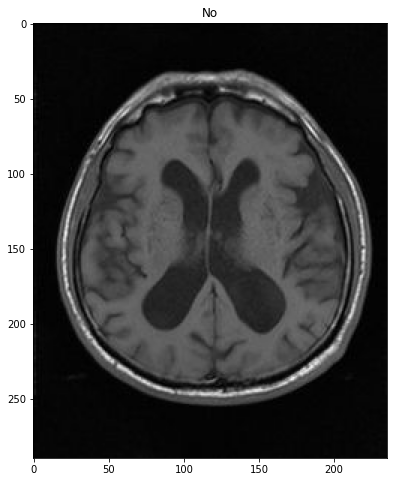

In [27]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10],0))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])
plt.show()

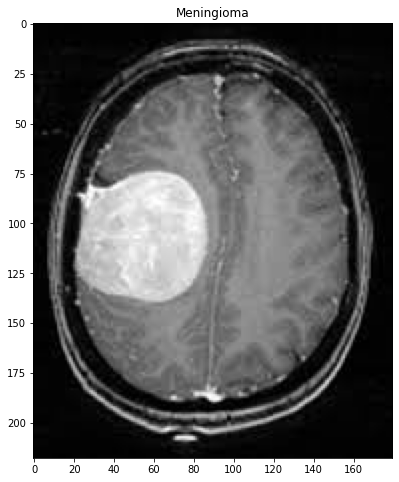

In [28]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Main_Train_Data["JPG"][7],0))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][7])
plt.show()

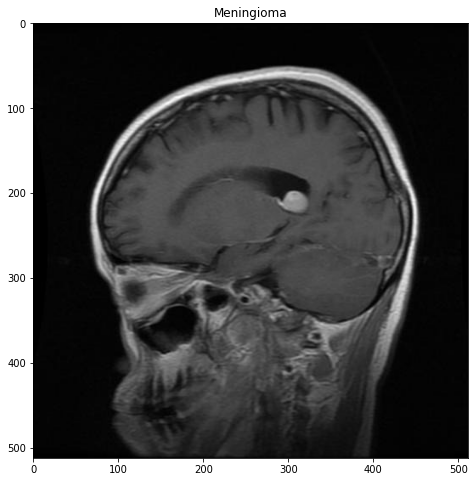

In [29]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Main_Train_Data["JPG"][200],0))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][200])
plt.show()

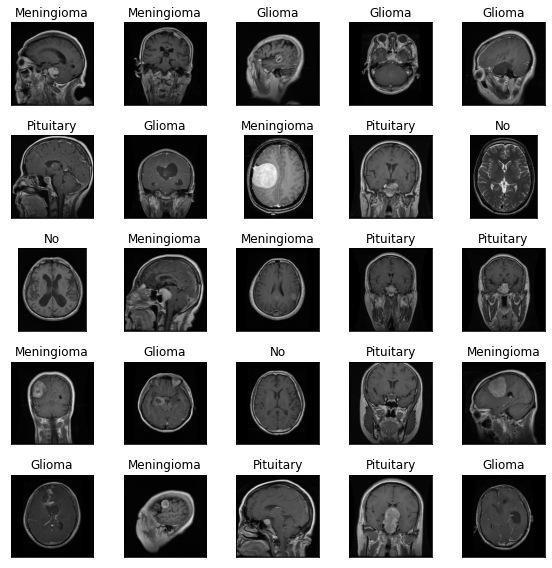

In [30]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

#### TEST

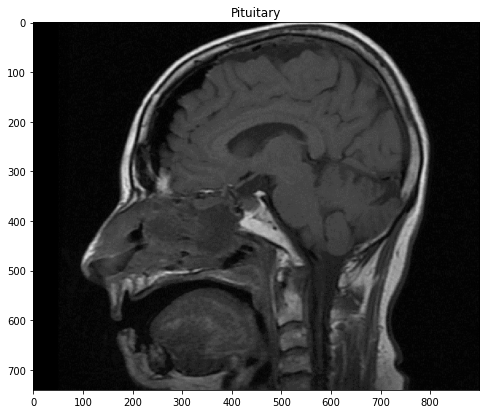

In [31]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Main_Test_Data["JPG"][200],0))
plt.title(Main_Test_Data["TUMOR_CATEGORY"][200])
plt.show()

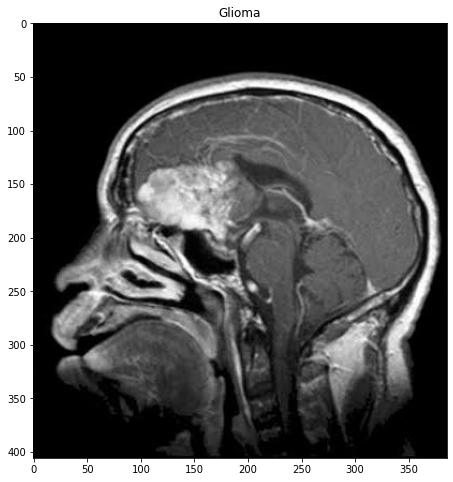

In [32]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Main_Test_Data["JPG"][2],0))
plt.title(Main_Test_Data["TUMOR_CATEGORY"][2])
plt.show()

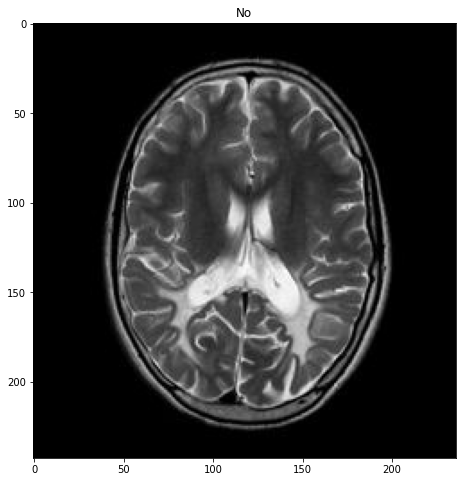

In [33]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(Main_Test_Data["JPG"][12],0))
plt.title(Main_Test_Data["TUMOR_CATEGORY"][12])
plt.show()

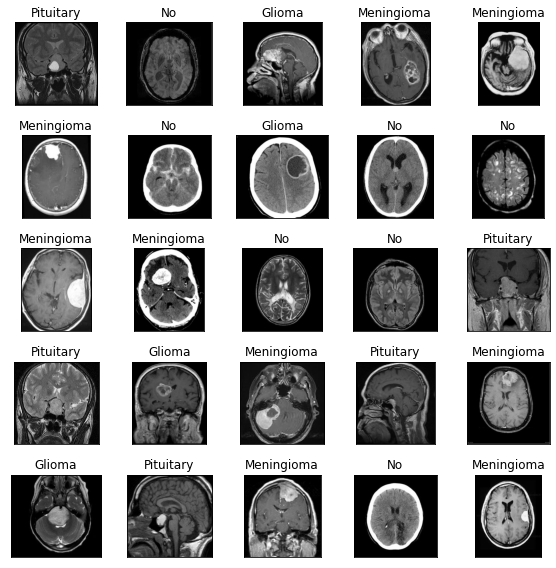

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Test_Data["JPG"][i]))
    ax.set_title(Main_Test_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

# MODEL TRAINING DATA

In [238]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [239]:
print(train_data.shape)

(2583, 2)


In [240]:
print(test_data.shape)

(287, 2)


# IMAGE GENERATOR

In [241]:
Generator = ImageDataGenerator(rescale=1./255,
                               brightness_range=[0.2,0.9],
                               featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0, validation_split=0.1)

In [242]:
Train_Set = Generator.flow_from_dataframe(dataframe=train_data,
                                         x_col="JPG",
                                         y_col="TUMOR_CATEGORY",
                                         seed=42,
                                          color_mode="rgb",
                                         class_mode="categorical",
                                          batch_size=10,
                                         subset="training"
                                         )

Found 2325 validated image filenames belonging to 4 classes.


In [243]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'Glioma': 0, 'Meningioma': 1, 'No': 2, 'Pituitary': 3}
[3, 0, 1, 0, 3]
(256, 256, 3)


In [244]:
Validation_Set = Generator.flow_from_dataframe(dataframe=train_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              seed=42,
                                               color_mode="rgb",
                                              class_mode="categorical",
                                              batch_size=10,
                                               subset="validation"
                                              )

Found 258 validated image filenames belonging to 4 classes.


In [245]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'Glioma': 0, 'Meningioma': 1, 'No': 2, 'Pituitary': 3}
[3, 1, 1, 3, 3]
(256, 256, 3)


In [246]:
Test_Set = Generator.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              seed=42,
                                               color_mode="rgb",
                                              class_mode="categorical",
                                              batch_size=10
                                              )

Found 287 validated image filenames belonging to 4 classes.


In [247]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'Glioma': 0, 'Meningioma': 1, 'No': 2, 'Pituitary': 3}
[3, 0, 3, 0, 0]
(256, 256, 3)


# MODEL

In [248]:
Model = Sequential()
#
Model.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu', input_shape = (256,256,3)))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

#
Model.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

#
Model.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

#
Model.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

# 
Model.add(Flatten())
Model.add(Dense(256, activation = "relu"))
Model.add(Dropout(0.25))
Model.add(Dense(4, activation = "softmax"))

In [249]:
Model.compile(optimizer=RMSprop(lr=0.001),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [250]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2,mode="min")

In [251]:
ANN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                     epochs=50,
                      batch_size=20,
                     callbacks=Call_Back)

Epoch 1/50
233/233 [==============================] - 18s 73ms/step - loss: 2.0764 - accuracy: 0.4287 - val_loss: 0.9730 - val_accuracy: 0.5969
Epoch 2/50
233/233 [==============================] - 17s 75ms/step - loss: 0.8733 - accuracy: 0.6360 - val_loss: 0.7630 - val_accuracy: 0.6783
Epoch 3/50
233/233 [==============================] - 17s 73ms/step - loss: 0.6497 - accuracy: 0.7416 - val_loss: 0.7048 - val_accuracy: 0.7209
Epoch 4/50
233/233 [==============================] - 17s 74ms/step - loss: 0.4976 - accuracy: 0.8122 - val_loss: 0.4824 - val_accuracy: 0.8178
Epoch 5/50
233/233 [==============================] - 17s 74ms/step - loss: 0.4078 - accuracy: 0.8467 - val_loss: 0.5272 - val_accuracy: 0.8450
Epoch 6/50
233/233 [==============================] - 17s 72ms/step - loss: 0.3432 - accuracy: 0.8817 - val_loss: 0.4261 - val_accuracy: 0.8760
Epoch 7/50
233/233 [==============================] - 17s 74ms/step - loss: 0.3088 - accuracy: 0.8864 - val_loss: 0.4912 - val_accuracy:

In [252]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.3552
ACCURACY:  0.91


In [253]:
print(Model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 60, 60, 128)      

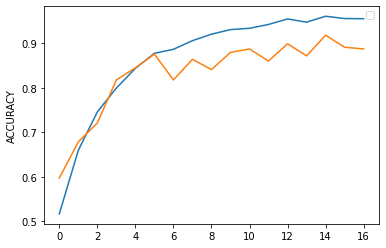

In [254]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [255]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

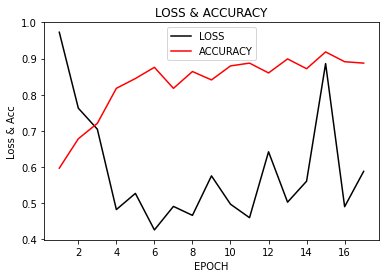

In [256]:
plt.plot(epochs,val_losses,"k-",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.show()

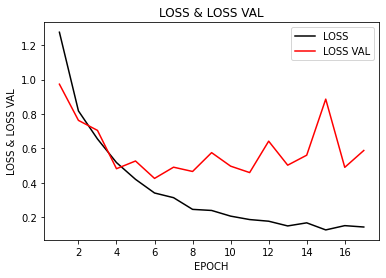

In [257]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"r",label="LOSS VAL")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

<AxesSubplot:>

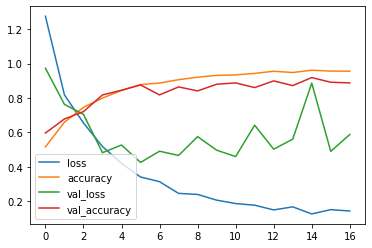

In [258]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

# PREDICTION PROCESS

In [259]:
Main_Test_Set = Generator.flow_from_dataframe(dataframe=Main_Test_Data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              seed=42,
                                               color_mode="rgb",
                                              class_mode="categorical",
                                              batch_size=20
                                              )

Found 394 validated image filenames belonging to 4 classes.


In [260]:
Model_Predict = Model.predict(Main_Test_Set)

In [261]:
Model_Predict = np.argmax(Model_Predict,axis=1)

In [262]:
Predict_Label = (Main_Test_Set.class_indices)
Predict_Label = dict((v,k) for k,v in Predict_Label.items())

In [263]:
Model_Predict = [Predict_Label[k] for k in Model_Predict]

In [270]:
print(Model_Predict[:50])

['No', 'No', 'Meningioma', 'Pituitary', 'Pituitary', 'Pituitary', 'No', 'Meningioma', 'Glioma', 'Meningioma', 'No', 'Meningioma', 'Meningioma', 'No', 'No', 'Pituitary', 'Meningioma', 'Glioma', 'Meningioma', 'Meningioma', 'Pituitary', 'Meningioma', 'No', 'Pituitary', 'Meningioma', 'No', 'Pituitary', 'No', 'Meningioma', 'Pituitary', 'Pituitary', 'No', 'No', 'Pituitary', 'Glioma', 'Meningioma', 'Pituitary', 'Pituitary', 'Pituitary', 'No', 'No', 'Glioma', 'No', 'Meningioma', 'Meningioma', 'No', 'No', 'Meningioma', 'Glioma', 'No']


In [265]:
Test_Results = list(Main_Test_Data["TUMOR_CATEGORY"])

In [271]:
print(Test_Results[:50])

['Pituitary', 'No', 'Glioma', 'Meningioma', 'Meningioma', 'Meningioma', 'No', 'Glioma', 'No', 'No', 'Meningioma', 'Meningioma', 'No', 'No', 'Pituitary', 'Pituitary', 'Glioma', 'Meningioma', 'Pituitary', 'Meningioma', 'Glioma', 'Pituitary', 'Meningioma', 'No', 'Meningioma', 'No', 'Meningioma', 'Glioma', 'Meningioma', 'Pituitary', 'No', 'Pituitary', 'Pituitary', 'No', 'Glioma', 'Glioma', 'No', 'Meningioma', 'Pituitary', 'Meningioma', 'Pituitary', 'Glioma', 'No', 'Meningioma', 'Glioma', 'Meningioma', 'No', 'Glioma', 'Meningioma', 'Meningioma']


In [267]:
Class_Report = classification_report(Test_Results,Model_Predict)
print(Class_Report)

              precision    recall  f1-score   support

      Glioma       0.24      0.06      0.10       100
  Meningioma       0.29      0.36      0.32       115
          No       0.28      0.42      0.34       105
   Pituitary       0.28      0.28      0.28        74

    accuracy                           0.28       394
   macro avg       0.28      0.28      0.26       394
weighted avg       0.28      0.28      0.26       394



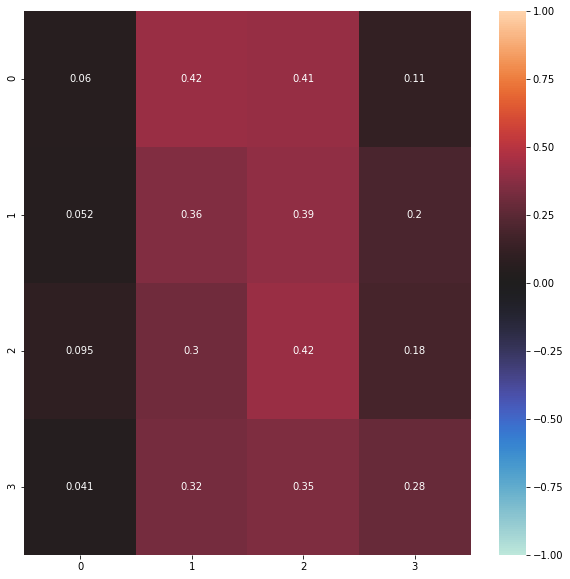

In [268]:
Conf_Report = confusion_matrix(Test_Results,Model_Predict, normalize="true")
figure = plt.figure(figsize=(10,10))
sns.heatmap(Conf_Report,vmax=1,center=0,vmin=-1,annot=True)
plt.show()

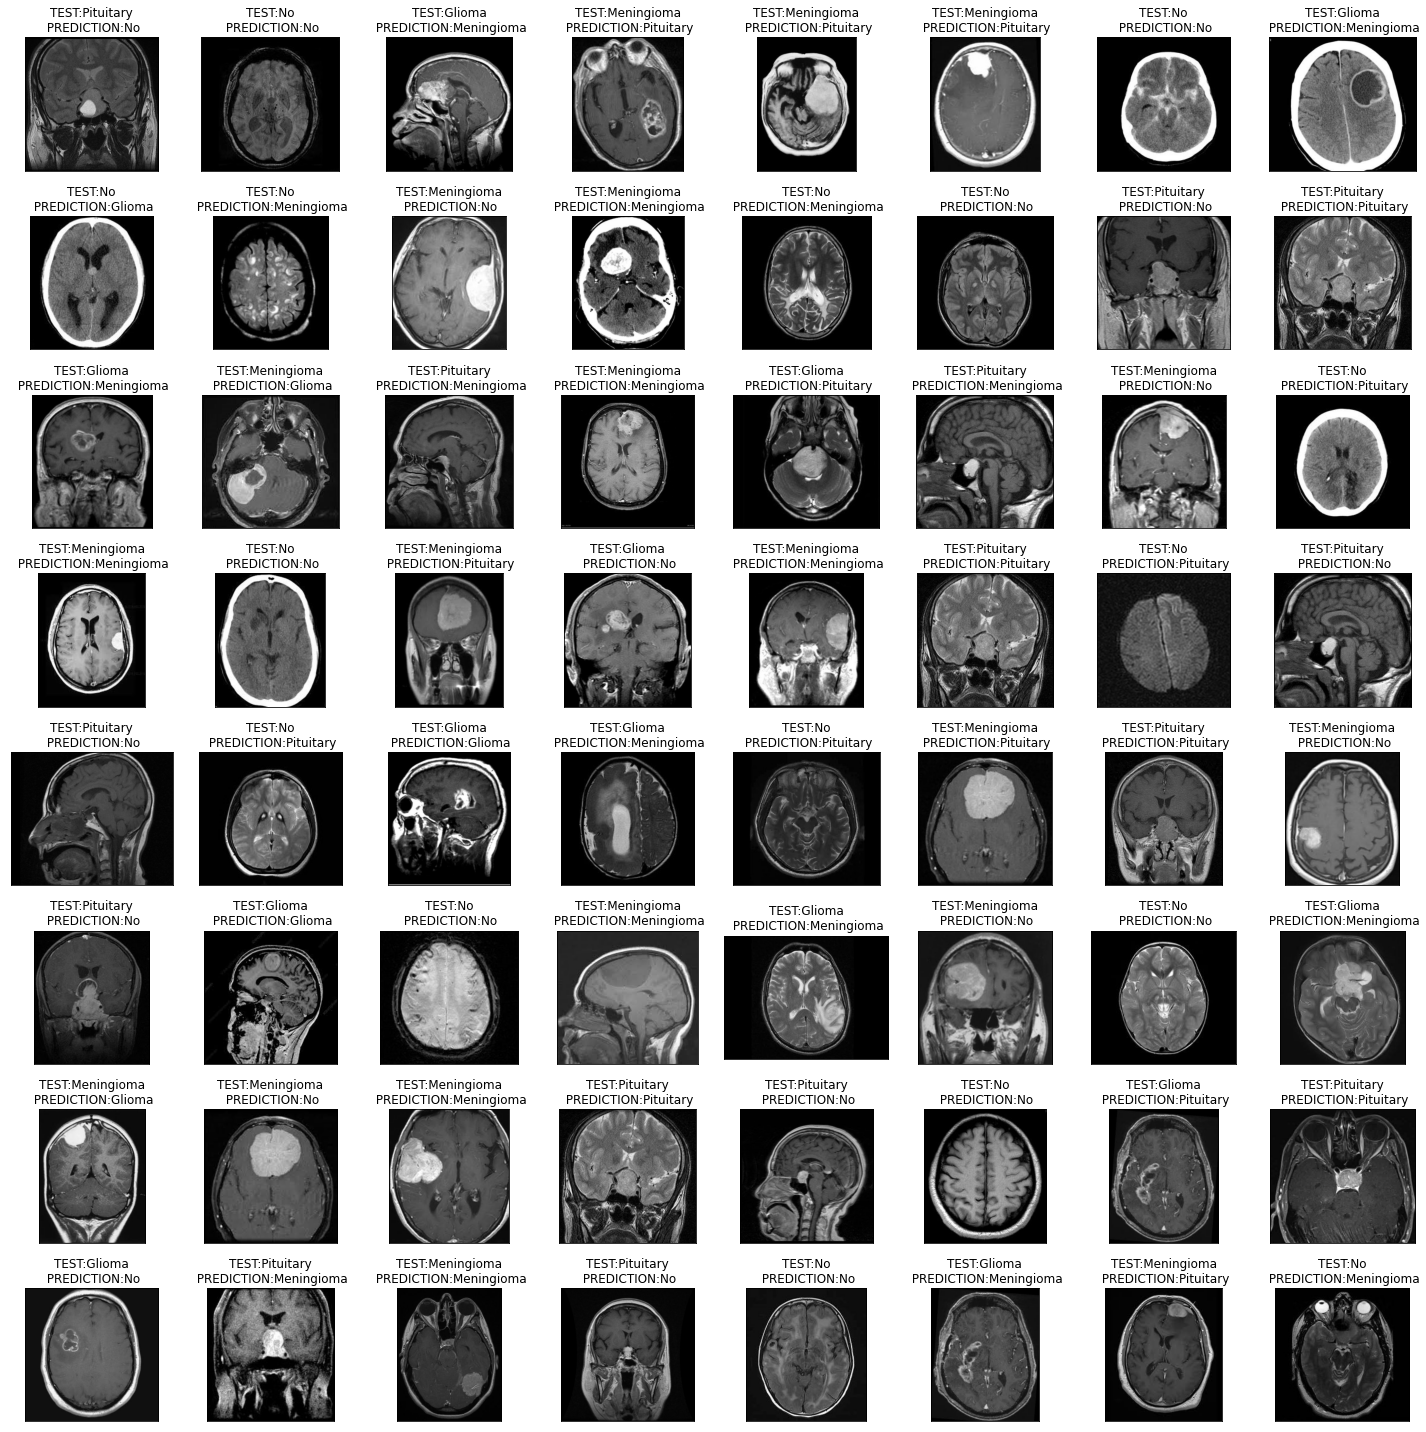

In [269]:
fig, axes = plt.subplots(nrows=8,
                         ncols=8,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Test_Data["JPG"].iloc[i]))
    ax.set_title(f"TEST:{Main_Test_Data.TUMOR_CATEGORY.iloc[i]}\n PREDICTION:{Model_Predict[i]}")
plt.tight_layout()
plt.show()